## 1.0 初步检查

In [22]:
import pathlib
path = pathlib.Path().resolve()
path

PosixPath('/Users/tuna/Desktop/p')

In [23]:
import geopandas
stations = geopandas.read_file(path / "xinanstations_close.zip")
stations

FID_    NO sheng  stationid  name type        Lat         Lon  altitude  \
0       2  1524    青海      56045    甘德  一般站  33.966667   99.900000    4050.0   
1       3  2207    云南      56646    剑川  一般站  26.533333   99.916667    2191.4   
2       4  2208    云南      56649    洱源  一般站  26.100000   99.966667    2059.9   
3       7  1957    四川      56443    乡城  一般站  28.933333   99.800000    2842.0   
4       8  2195    云南      56543  香格里拉  基本站  27.833333   99.750000    3341.5   
..    ...   ...   ...        ...   ...  ...        ...         ...       ...   
134   375  2223    云南      56751    大理  基准站  25.700000  100.183333    1990.5   
135   376  2224    云南      56752    宾川  一般站  25.833333  100.566667    1438.7   
136   377  2225    云南      56755    弥渡  一般站  25.383333  100.400000    1711.7   
137   378  2226    云南      56756    祥云  一般站  25.483333  100.583333    1992.9   
138   380  2257    云南      56851    南涧  一般站  25.033333  100.516667    1377.2   

     alt_qiya  memo                                 geometry  
0      4050.8  None   POINT Z (99.90000 33.96667 4050.00000)  
1      2193.5  None   POINT Z (99.91667 26.53333 2191.40000)  
2      2059.9  None   POINT Z (99.96667 26.10000 2059.90000)  
3      2843.3  None   POINT Z (99.80000 28.93333 2842.00000)  
4      3342.5  新址启用   POINT Z (99.75000 27.83333 3341.50000)  
..        ...   ...                                      ...  
134    1991.6  None  POINT Z (100.18333 25.70000 1990.50000)  
135    1440.3  None  POINT Z (100.56667 25.83333 1438.70000)  
136    1712.7  None  POINT Z (100.40000 25.38333 1711.70000)  
137    1993.5  None  POINT Z (100.58333 25.48333 1992.90000)  
138    1378.6  None  POINT Z (100.51667 25.03333 1377.20000)  

[139 rows x 12 columns]

<Axes: >

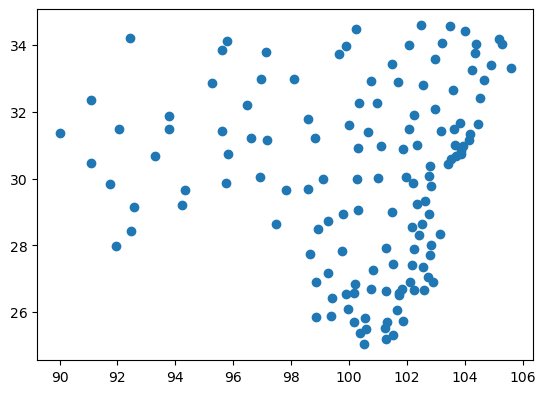

In [24]:
stations.plot()

In [25]:
watersheds1_Dis_directory = path / "watersheds1_Dis"
watersheds1_Dis_directory

PosixPath('/Users/tuna/Desktop/p/watersheds1_Dis')

In [26]:
watersheds = geopandas.read_file(watersheds1_Dis_directory / "watersheds1_Dis.shp")
watersheds

SUBALPINEF       Region                                           geometry
0           1        嘉陵江上游  MULTIPOLYGON (((104.20289 34.37662, 104.20312 ...
1           3         岷江上游  POLYGON ((103.55706 33.15375, 103.55901 33.152...
2           4          大渡河  POLYGON ((100.38372 33.64170, 100.38575 33.640...
3           5        雅砻江上游  POLYGON ((99.55259 33.06813, 99.55278 33.06639...
4           6    金沙江上游亚高山段  MULTIPOLYGON (((100.27431 25.82178, 100.27263 ...
5           7        澜沧江上游  POLYGON ((94.55192 33.82312, 94.55360 33.82177...
6           8         怒江上游  POLYGON ((93.31213 32.57615, 93.31067 32.57593...
7           9  雅鲁藏布江上游亚高山段  POLYGON ((93.21182 31.04873, 93.21483 31.04785...
8         109       藏南亚高山区  POLYGON ((95.97700 29.36683, 95.97767 29.36537...

In [27]:
crs_info = watersheds.crs
print("坐标系信息:", crs_info)

坐标系信息: EPSG:4326


<Axes: >

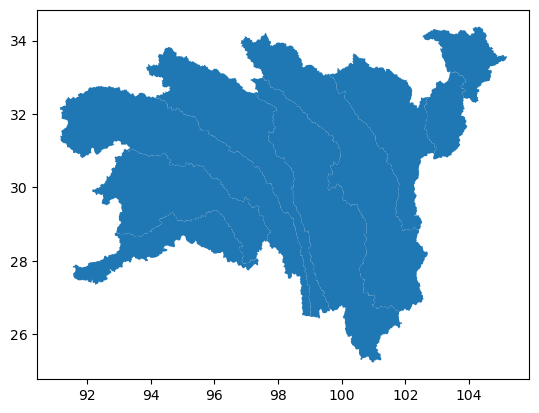

In [28]:
watersheds.plot()

In [29]:
crs_info = watersheds.crs
print("坐标系信息:", crs_info)

坐标系信息: EPSG:4326


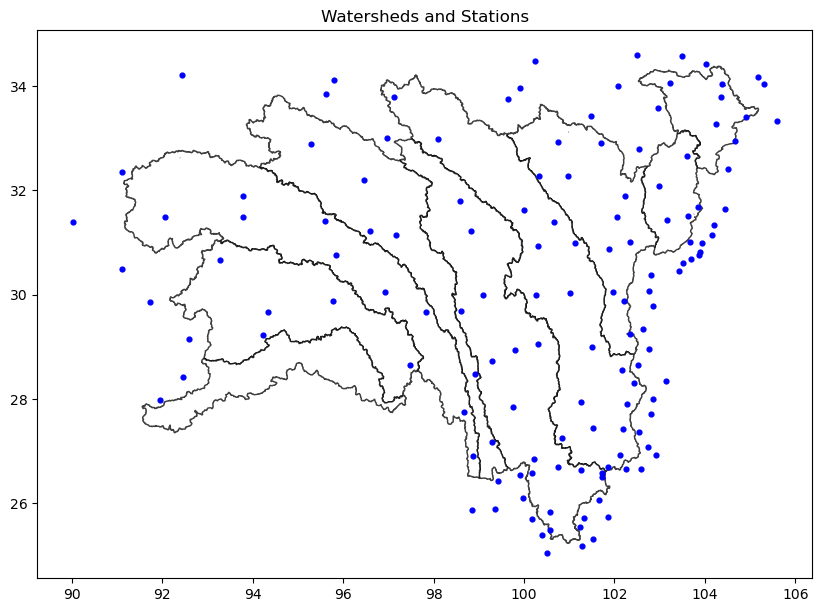

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 watersheds 和 stations 已经被正确加载

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制 watersheds
watersheds.plot(ax=ax, color='white', edgecolor='black', alpha=0.75, label='Watersheds')

# 绘制 stations
stations.plot(ax=ax, color='blue', markersize=12, label='Stations')

# 设置图例
# ax.legend(loc='lower right')

# 设置图形标题
plt.title('Watersheds and Stations')

# 显示图形
plt.show()

In [31]:
print(stations.columns)

Index(['FID_', 'NO', 'sheng', 'stationid', 'name', 'type', 'Lat', 'Lon',
       'altitude', 'alt_qiya', 'memo', 'geometry'],
      dtype='object')


In [32]:
# disable_clustering_at_zoom 越小
# 在更小的比例尺点图层也不会聚类

import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Assuming watersheds and stations are correctly loaded

# Create a basic map centered at the average latitude and longitude of the data
center_latitude = (watersheds.total_bounds[1] + watersheds.total_bounds[3]) / 2
center_longitude = (watersheds.total_bounds[0] + watersheds.total_bounds[2]) / 2

# Create a map with MarkerCluster
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)
marker_cluster = MarkerCluster(disable_clustering_at_zoom=5).add_to(m)

# Add Watersheds to the map
folium.GeoJson(watersheds).add_to(m)

# Add Stations to the map without clustering
for idx, station in stations.iterrows():
    folium.Marker([station['Lat'], station['Lon']], popup=station['name']).add_to(marker_cluster)

# Show the map
m


In [33]:
import geopandas
stations = geopandas.read_file(path / "xinanstations_close.zip")
stations

FID_    NO sheng  stationid  name type        Lat         Lon  altitude  \
0       2  1524    青海      56045    甘德  一般站  33.966667   99.900000    4050.0   
1       3  2207    云南      56646    剑川  一般站  26.533333   99.916667    2191.4   
2       4  2208    云南      56649    洱源  一般站  26.100000   99.966667    2059.9   
3       7  1957    四川      56443    乡城  一般站  28.933333   99.800000    2842.0   
4       8  2195    云南      56543  香格里拉  基本站  27.833333   99.750000    3341.5   
..    ...   ...   ...        ...   ...  ...        ...         ...       ...   
134   375  2223    云南      56751    大理  基准站  25.700000  100.183333    1990.5   
135   376  2224    云南      56752    宾川  一般站  25.833333  100.566667    1438.7   
136   377  2225    云南      56755    弥渡  一般站  25.383333  100.400000    1711.7   
137   378  2226    云南      56756    祥云  一般站  25.483333  100.583333    1992.9   
138   380  2257    云南      56851    南涧  一般站  25.033333  100.516667    1377.2   

     alt_qiya  memo                                 geometry  
0      4050.8  None   POINT Z (99.90000 33.96667 4050.00000)  
1      2193.5  None   POINT Z (99.91667 26.53333 2191.40000)  
2      2059.9  None   POINT Z (99.96667 26.10000 2059.90000)  
3      2843.3  None   POINT Z (99.80000 28.93333 2842.00000)  
4      3342.5  新址启用   POINT Z (99.75000 27.83333 3341.50000)  
..        ...   ...                                      ...  
134    1991.6  None  POINT Z (100.18333 25.70000 1990.50000)  
135    1440.3  None  POINT Z (100.56667 25.83333 1438.70000)  
136    1712.7  None  POINT Z (100.40000 25.38333 1711.70000)  
137    1993.5  None  POINT Z (100.58333 25.48333 1992.90000)  
138    1378.6  None  POINT Z (100.51667 25.03333 1377.20000)  

[139 rows x 12 columns]

In [34]:
import geopandas

# 提取每个点要素的经纬度坐标
stations['x'] = stations.geometry.x
stations['y'] = stations.geometry.y

# 打印包含经纬度的数据框
print(stations[['stationid','x', 'y']])


     stationid           x          y
0        56045   99.900000  33.966667
1        56646   99.916667  26.533333
2        56649   99.966667  26.100000
3        56443   99.800000  28.933333
4        56543   99.750000  27.833333
..         ...         ...        ...
134      56751  100.183333  25.700000
135      56752  100.566667  25.833333
136      56755  100.400000  25.383333
137      56756  100.583333  25.483333
138      56851  100.516667  25.033333

[139 rows x 3 columns]


In [35]:
import geopandas

# 提取每个点要素的经纬度坐标
stations['x'] = stations.geometry.x
stations['y'] = stations.geometry.y

# 打印包含经纬度的数据
stations_xy = stations[['stationid','x', 'y']]
stations_xy

stationid           x          y
0        56045   99.900000  33.966667
1        56646   99.916667  26.533333
2        56649   99.966667  26.100000
3        56443   99.800000  28.933333
4        56543   99.750000  27.833333
..         ...         ...        ...
134      56751  100.183333  25.700000
135      56752  100.566667  25.833333
136      56755  100.400000  25.383333
137      56756  100.583333  25.483333
138      56851  100.516667  25.033333

[139 rows x 3 columns]

In [36]:
stations_xy = stations_xy.rename(
    columns={
        "stationid": "station",
    }
)

stations_xy

station           x          y
0      56045   99.900000  33.966667
1      56646   99.916667  26.533333
2      56649   99.966667  26.100000
3      56443   99.800000  28.933333
4      56543   99.750000  27.833333
..       ...         ...        ...
134    56751  100.183333  25.700000
135    56752  100.566667  25.833333
136    56755  100.400000  25.383333
137    56756  100.583333  25.483333
138    56851  100.516667  25.033333

[139 rows x 3 columns]

In [37]:
# stations_xy.to_csv(path / 'SouthWest_stations.csv', index=False)

## 2.0 年相对误差小于 0.1 站点

### 2.1 6次及以上站点

In [49]:
import pandas as pd

Relative_Error_010_06 = pd.read_csv( path / '2' / 'Relative_Error_010_06.csv')

station_list_RE_010_06 = Relative_Error_010_06['station'].unique()

print(station_list_RE_010_06)
print(len(station_list_RE_010_06))

[56251 56459 56764 56097 56646 56273 56665 56144 56652 56761 56116 56128
 56146 56664 56342 56167 56263 56578 56106 56487 56475 56474 56443 56441
 56307 56312 56543 56331 56669 56152 56021 56473 56649 56257 56670 56267
 57007 55593 56278 56357 55299]
41


In [54]:
import geopandas as gpds

# 使用 isin() 方法检查 'stationid' 列的值是否在 station_list_RE_010 数组中
station_RE_010_06 = stations[stations['stationid'].isin(station_list_RE_010_06)]


print(station_RE_010_06)

print(len(station_RE_010_06))

     FID_    NO sheng  stationid  name type        Lat         Lon  altitude  \
1       3  2207    云南      56646    剑川  一般站  26.533333   99.916667    2191.4   
2       4  2208    云南      56649    洱源  一般站  26.100000   99.966667    2059.9   
3       7  1957    四川      56443    乡城  一般站  28.933333   99.800000    2842.0   
4       8  2195    云南      56543  香格里拉  基本站  27.833333   99.750000    3341.5   
8      14  1956    四川      56441    得荣  一般站  28.716667   99.283333    2422.9   
16     25  1880    四川      56144    德格  基本站  31.800000   98.583333    3184.0   
17     26  2083    西藏      56342    芒康  一般站  29.683333   98.600000    3870.0   
19     33  2082    西藏      56331    左贡  基本站  29.666667   97.833333    3780.0   
25     41  2073    西藏      56128   类乌齐  一般站  31.216667   96.600000    3810.0   
28     44  1519    青海      56021   曲麻莱  基本站  34.116667   95.800000    4175.0   
31     47  2072    西藏      56116    丁青  基本站  31.416667   95.600000    3873.1   
33     49  2080    西藏      56312    林芝  

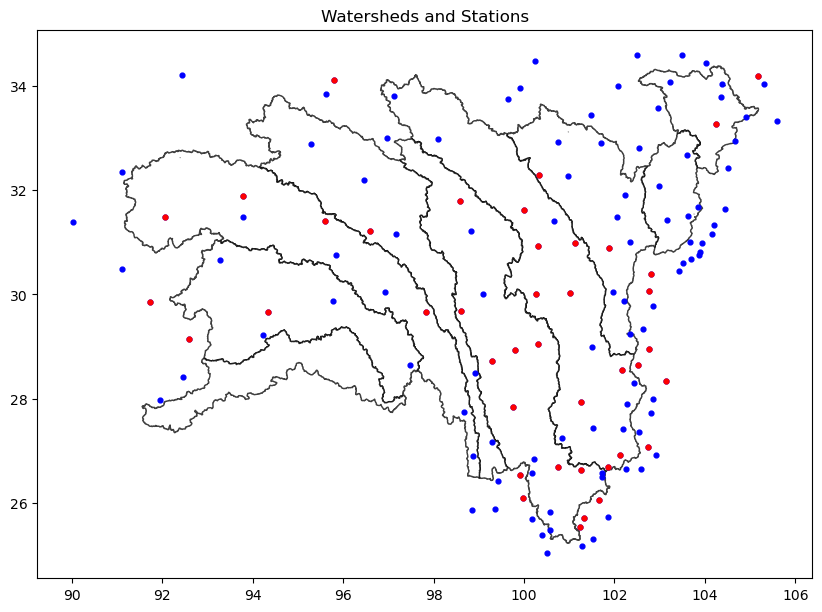

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 watersheds、stations 和 station_RE_010_06 已经被正确加载

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制 watersheds
watersheds.plot(ax=ax, color='white', edgecolor='black', alpha=0.75, label='Watersheds')

# 绘制 stations
stations.plot(ax=ax, color='blue', markersize=12, label='Stations')

# 绘制 station_RE_010_06
station_RE_010_06.plot(ax=ax, color='red', markersize=12, label='Station RE 010 06')

# 设置图例
# ax.legend(loc='lower right')

# 设置图形标题
plt.title('Watersheds and Stations')

# 显示图形
plt.show()


In [41]:
type(stations)

geopandas.geodataframe.GeoDataFrame

### 2.2 所有次数显示

In [72]:
import pandas as pd

Relative_Error_010_station_counts = pd.read_csv( path / '2' / 'Relative_Error_010_station_counts.csv')

Relative_Error_010_station_counts

Unnamed: 0  station  counts
0             0    56251       9
1             1    56459       9
2             2    56764       9
3             3    56097       8
4             4    56646       8
..          ...      ...     ...
130         130    56197       1
131         131    56202       1
132         132    56227       1
133         133    56462       1
134         134    56285       1

[135 rows x 3 columns]

In [73]:
# 合并
station_Relative_Error_010 = pd.merge(stations, Relative_Error_010_station_counts, left_on=['stationid'], right_on=['station'], how='inner')

# 删除重复的列
station_Relative_Error_010.drop(['stationid'], axis=1, inplace=True)

# merged_data 包含了按行合并后的结果
station_Relative_Error_010.head()

FID_    NO sheng  name type        Lat        Lon  altitude  alt_qiya  \
0     2  1524    青海    甘德  一般站  33.966667  99.900000    4050.0    4050.8   
1     3  2207    云南    剑川  一般站  26.533333  99.916667    2191.4    2193.5   
2     4  2208    云南    洱源  一般站  26.100000  99.966667    2059.9    2059.9   
3     7  1957    四川    乡城  一般站  28.933333  99.800000    2842.0    2843.3   
4     8  2195    云南  香格里拉  基本站  27.833333  99.750000    3341.5    3342.5   

   memo                                geometry          x          y  \
0  None  POINT Z (99.90000 33.96667 4050.00000)  99.900000  33.966667   
1  None  POINT Z (99.91667 26.53333 2191.40000)  99.916667  26.533333   
2  None  POINT Z (99.96667 26.10000 2059.90000)  99.966667  26.100000   
3  None  POINT Z (99.80000 28.93333 2842.00000)  99.800000  28.933333   
4  新址启用  POINT Z (99.75000 27.83333 3341.50000)  99.750000  27.833333   

   Unnamed: 0  station  counts  
0          67    56045       5  
1           4    56646       8  
2          32    56649       6  
3          22    56443       7  
4          26    56543       7

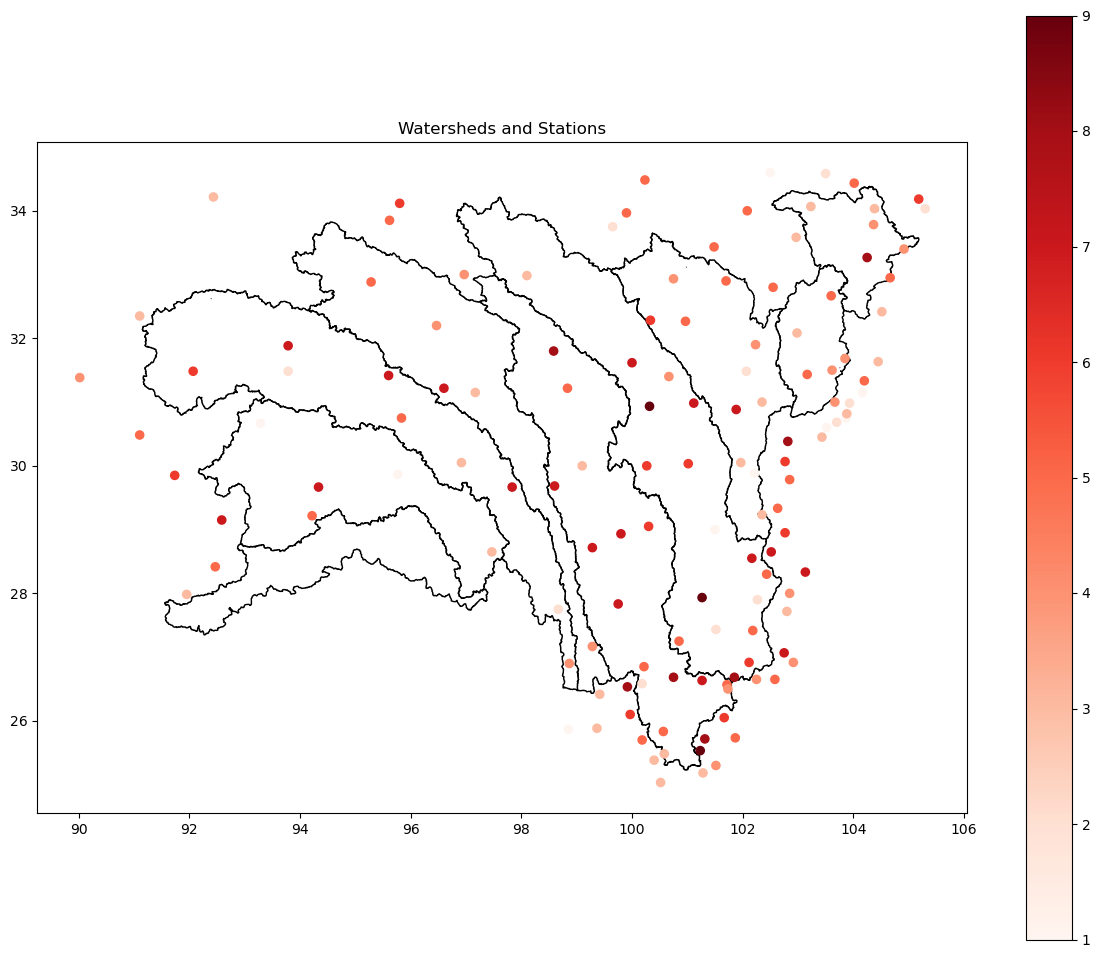

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 watersheds 和 station 已经被正确加载

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(15, 12))

# 绘制 watersheds
watersheds.plot(ax=ax, color='white', edgecolor='black', alpha=1, label='Watersheds')

# 绘制 stations，并根据 counts 列的大小进行配色
station_Relative_Error_010.plot(ax=ax, column='counts', cmap='Reds', legend=True, markersize=35)  # 调整点的大小为 10

# 设置图形标题
plt.title('Watersheds and Stations')

# 显示图形
plt.show()


